# Principle of Minimal action and Lagrange-Euler equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

from celluloid import Camera
from IPython.display import HTML
from base64 import b64encode

## Newton's Laws - Review

[Newton's laws of motion](https://en.wikipedia.org/wiki/Newton's_laws_of_motion) are considered the foundations of classical mechanics. They describe the relationship between the motion of a body and the forces acting on it. For simplicity, we will consider the motion of a particle in 1D space. The derived relationships are general and can be easily expressed in 3D or using generalized coordinates.

\begin{equation}
\vec{r}(t) = \vec{x}(t) = x \vec{i}
\end{equation}

And given its position, the velocity and acceleration of the particle are:

\begin{equation} \begin{array}{l}
\vec{v}(t) = \dfrac{\mathrm d \vec{x}(t)}{\mathrm d t} = \dfrac{d x(t)}{\mathrm d t}\vec{i}= \dot{\vec{x}}\\[2em]
\vec{a}(t) = \dfrac{\mathrm d \vec{x}(t)}{\mathrm d t} = \dfrac{\mathrm d^2 \vec{x}(t)}{\mathrm d t^2} = \ddot{\vec{x}}
\end{array}
\end{equation}

The momentum of a particle is defined as:

\begin{equation}
\vec{p}(t) = m\vec{v}(t) = m \dot{\vec{x}}
\end{equation}

where $m$ and $\dot{\vec{x}}$ are the mass and velocity of the body.

Newton's second law relates the resultant force acting on a particle to the rate of change of its momentum, and if the mass is constant:

\begin{equation} \begin{array}{l}
\vec{F}(t) = \dfrac{\mathrm d \vec{p}(t)}{\mathrm d t} = \dfrac{\mathrm d (m \vec{v}(t))}{\mathrm d t} = \dfrac{\mathrm d (m \dot{\vec{x}})}{\mathrm d t}\\[2em]
\vec{F}(t) = m\vec{a}(t) = m \ddot{\vec{x}}
\end{array} \end{equation}

</span>

From Newton's second law, if the position of a particle at any instant is known, the resultant force acting on it can be determined. If the position is unknown but the resultant force is, the position of the particle can be determined by solving the following second-order ordinary differential equation:

\begin{equation}
\frac{\mathrm d^2 \vec{x}(t)}{\mathrm d t^2} = \frac{\vec{F}(t)}{m}
\end{equation}

The above differential equation is referred to as the equation of motion of the particle. For example, a system of $N$ particles will require $N$ equations to describe it in 1D and $3N$ equations in 3D. The equation of motion has the general solution

\begin{equation}
\vec{x}(t) = \int \left(\int\frac{\vec{F}(t)}{m} \mathrm{d}t\right) \mathrm{d}t
\end{equation}

which requires determining two constants, the initial position and the velocity. For simplicity, we will abandon vector notation for a moment and describe the position of the part using the parameter $x$, the position on the number axis. The sign determines the direction of the vector.

## Energy, force, momentum

To describe the state of particles, we can also use mechanical energy, which is the sum of kinetic and potential energy. The kinetic energy, $E_k$ of a particle is given by:

\begin{equation}
E_k = \frac{1}{2}m v^2
\end{equation}

Which can be expressed in terms of momentum as:

\begin{equation}
E_k = \frac{1}{2m} p^2
\end{equation}

And for a given coordinate of motion of a particle, its momentum can be obtained from its kinetic energy:

\begin{equation}
\vec{p} = \frac{\partial E_k}{\partial \vec{v}}
\end{equation}

Potential energy $U$ is the stored energy of a particle and its formulation depends on the force acting on the particle. For a conservative force depending only on the position of a particle $x$ in 1D, for example due to the gravitational field near the Earth's surface or due to a linear spring, the force can be expressed in terms of the potential energy gradient:

\begin{equation}
\vec{F} = -\nabla U(\vec{x}) = -\frac{\partial U}{\partial x}\vec{i}
\label{eq12}
\end{equation}

## Lagrange's equation in Cartesian coordinates

For simplicity, let's first derive Lagrange's equation for a particle in Cartesian coordinates and from Newton's second law.

Since we want to derive the laws of motion based on the mechanical energy of the particle, we can see that the time derivative of the expression for momentum as a function of kinetic energy is equal to the force acting on the particle, and we can replace the force in Newton's second law with this expression:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial E_k}{\partial \dot x}\right) = m\ddot x
\label{eq13}
\end{equation}

We saw that the conservative force can also be expressed in terms of the potential energy of the particle; if we replace the right side of the above equation with this expression, we have:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial T}{\partial \dot x}\right) = -\frac{\partial U}{\partial x}
\label{eq14}
\end{equation}

Using the fact that:

\begin{equation}
\frac{\partial E_k}{\partial x} = 0 \quad and \quad \frac{\partial U}{\partial \dot x} = 0
\label{eq15}
\end{equation}

We can write:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial (E_k-U)}{\partial \dot x}\right) - \frac{\partial (E_k-U)}{\partial x} = 0
\label{eq16}
\end{equation}

We define the Lagrangian $\mathcal{L}$ as the difference between the kinetic and potential energy in the system:

\begin{equation}
\mathcal{L} = T - V
\label{eq17}
\end{equation}

For a conservative force acting on a particle, we have Lagrangian equation in Cartesian coordinates:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial \mathcal{L}}{\partial \dot x}\right) - \frac{\partial \mathcal{L}}{\partial x} = 0
\label{eq18}
\end{equation}

## Motion as Optimization

This approach starts with a quantity called action. If you minimize the action, you can get the path of least action, which is the path that a physical system will take through space and time. Generally speaking, physicists use analytical tools to do this minimization. The principle of least action is a variational principle that allows us to predict what the equations of motion of any physical system will look like.
In layman's terms, it is a way to choose, from all conceivable trajectories of a system, the one along which some characteristic of the system (such as energy) is minimal. This is what actually happens.

Now, to put our approach in context, let's quickly review the standard approaches to this kind of problem

### Standard Approach

For an upward throw with initial velocity $v_0$ and initial height $y_0$,

$$y(t)=-\frac{1}{2}gt^2+v_0t+y_0$$

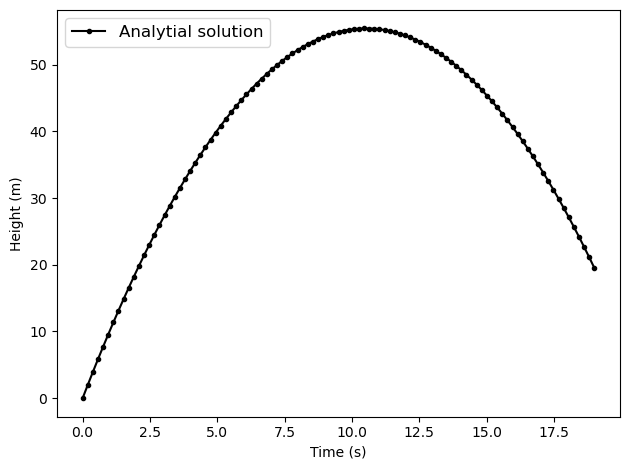

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def falling_object_analytic(x0, x1, dt, g=1, steps=100):
    v0 = (x1 - x0) / dt
    t = np.linspace(0, steps, steps+1) * dt
    x = -.5*g*t**2 + v0*t + x0  # the equation of motion
    return t, x

x0, x1 = [0, 2]
dt = 0.19
t_ana, x_ana = falling_object_analytic(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytial solution')
plt.xlabel('Time (s)') ; plt.ylabel('Height (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Numerical approach

Not all physics problems have an analytical solution. Some, like the double pendulum or the three-body problem, are deterministic but chaotic. In other words, their dynamics are predictable, but we cannot know their state at some future time without simulating all the intervening states. We can solve these by numerical integration. For a body in a gravitational field, the numerical approach would look like this:

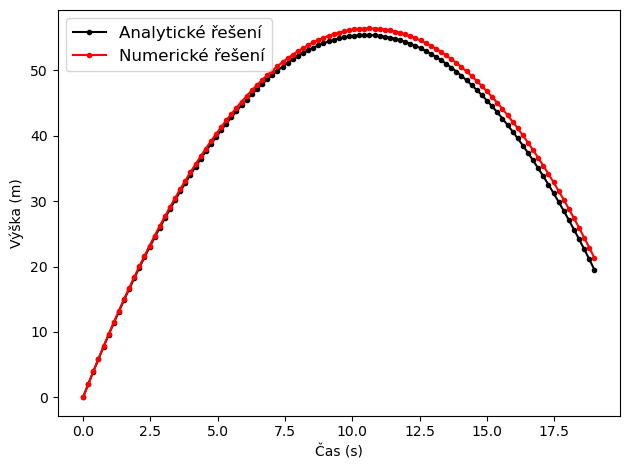

In [4]:
def falling_object_numerical(x0, x1, dt, g=1, steps=100):
    xs = [x0, x1]
    ts = [0, dt]
    v = (x1 - x0) / dt
    x = xs[-1]
    for i in range(steps-1):
        v += -g*dt
        x += v*dt
        xs.append(x)
        ts.append(ts[-1]+dt)
    return np.asarray(ts), np.asarray(xs)

t_num, x_num = falling_object_numerical(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytické řešení')
plt.plot(t_num, x_num, 'r.-', label='Numerické řešení')
plt.xlabel('Čas (s)') ; plt.ylabel('Výška (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Minimizing Action

**Lagrangian Method.** The approaches we just discussed make intuitive sense. That's why we teach them in introductory physics classes. However, there is a completely different way to look at dynamics, called Lagrangian Method. Lagrangian Method better describes reality because it can produce equations of motion for any physical system. Lagrangians figure in all four branches of physics: classical mechanics, electricity and magnetism, thermodynamics, and quantum mechanics. Without Lagrangian Method, physicists would have a hard time unifying these disparate fields. But with [the standard model of the Lagrangian] (https://www.symmetrymagazine.org/article/the-deconstructed-standard-model-equation) they can do just that.

**How ​​it works.** The Lagrangian Method begins by considering all the paths a physical system could take from an initial state $\bf x(t_0)$ to a final state $\bf x(t_1)$. Then it provides a simple rule for choosing the path $\hat{\bf x}$ that nature will actually take: the action $S$, defined in the equation below, must have a stationary value over this path. Here $T$ and $V$ are functions of the kinetic and potential energy for the system at any given time $t$ in $[t_0,t_1]$.
$$
\begin{aligned}
S &:= \int_{t_0}^{t_1} L({\bf x}, ~ \dot{\bf x}, ~ t) ~ dt
\quad \textrm{where}\quad L = T - V \\
\quad \hat{\bf x} &~~ \textrm{has the property} \quad \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\hat{x}}(t)} \right) = \frac{\partial L}{\partial \hat{x}(t)} \quad \textrm{for} \quad t \in [t_0,t_1]
\end{aligned}
$$
**Finding $\hat{\bf x}$ using Euler-Lagrange (what people usually do).** When $S$ is stationary, we can show that the Euler-Lagrange equation (the second line of the above equations) holds on the interval $[t_0,t_1]$ (Morin, 2008). This observation is valuable because it allows us to solve for $\hat{\bf x}$: first we apply the Euler-Lagrange equation to the Lagrangian $L$ and derive a system of partial differential equations. Then we integrate these equations to obtain $\hat{\bf x}$. Importantly, this approach works for all problems involving classical mechanics, electrodynamics, thermodynamics, and the theory of relativity. It provides a comprehensive theoretical framework for the study of classical physics as a whole.

**Finding $\hat{\bf x}$ with action minimization (what we will do).** A more straightforward approach to finding $\hat{\bf x}$ starts with the observation that paths of stationary action are almost always _also_ paths of least action (Morin 2008). Thus, without much loss of generality, we can replace the Euler-Lagrange equation with the simple minimization objective given in the third part of the equation below. Meanwhile, as shown in the first part of the equation below, we can redefine $S$ as a discrete sum over $N$ uniformly distributed time slices:
$$
S := \sum_{i=0}^{N} L({\bf x}, ~ \dot{{\bf x}}, ~ t_i) \Delta t \quad \textrm{where} \quad \dot{{\bf x}}(t_i) := \frac{ {\bf x}(t_{i+1}) - {\bf x}(t_{i})}{\Delta t} \quad \textrm{and} \quad \hat{\bf x} := \underset{\bf x}{\textrm{argmin}} ~ S(\bf x)
$$
One problem remains: after discretizing $\hat{ \bf x}$, we can no longer take its derivative to obtain the exact value for $\dot{ \bf x}(t_i)$. Instead, we must use the finite difference approximation given in the second part of the equation above. This approximation will of course not be possible for the very last $\dot{ \bf x}$ in the sum, since $\dot{ \bf x}_{N+1}$ does not exist. For this value, we will assume that for large $N$ the change in velocity over the interval $\Delta t$ is small and let $\dot{ \bf x}_N = \dot{ \bf x}_{N-1}$. Having made this last approximation, we can now calculate the gradient $\frac{\partial S}{\partial {\bf x}}$ numerically and use it to minimize $S$. This can be done using PyTorch (Paszke et al, 2019) or any other package that supports automatic differentiation.

In [5]:
def lagrangian_freebody(x, xdot, m=1, g=1):
    T = .5*m*xdot**2
    V = m*g*x
    return T, V
  
def action(x, dt):
    xdot = (x[1:] - x[:-1]) / dt
    xdot = torch.cat([xdot, xdot[-1:]], axis=0)
    T, V = lagrangian_freebody(x, xdot)
    return T.sum()-V.sum()

Now let's look for the point of stationary action. Technically, it can be a minimum OR an inflection point. Here we will only look for the minimum:

In [6]:
import torch
def get_path_between(x, steps=1000, step_size=1e-1, dt=1, num_prints=8, num_stashes=80):
    t = np.linspace(0, len(x)-1, len(x)) * dt
    print_on = np.linspace(0,int(np.sqrt(steps)),num_prints).astype(np.int32)**2 # print more often early in loop
    stash_on = np.linspace(0,int(np.sqrt(steps)),num_stashes).astype(np.int32)**2
    xs = []
    for i in range(steps):
        grad_x = torch.autograd.grad(action(x, dt), x)[0]
        grad_x[[0,-1]] *= 0  # fix first and last coordinates by zeroing their grads
        x.data -= grad_x * step_size

        if i in print_on:
            print('step={:04d}, S={:.4e} J*s'.format(i, action(x, dt).item()))
        if i in stash_on:
            xs.append(x.clone().data.numpy())
    return t, x, np.stack(xs)

Now let's put it all together. We can initialize the trajectory of our falling particle as any random trajectory through space. In the code below, we have chosen a trajectory where the particle randomly bounces around x=0 until time t=19 seconds, when it jumps to the final state x = $x_num[-1]$ = 21.3 meters. This trajectory has a large action force S = 5425 J-s. During optimization, this value gradually decreases until we reach a parabolic arc with an action force S = -2500 J-s.

step=0000, S=4.7780e+03 J*s
step=0400, S=-4.6972e+02 J*s
step=1600, S=-1.4938e+03 J*s
step=3600, S=-2.1676e+03 J*s
step=6400, S=-2.4291e+03 J*s
step=10000, S=-2.4901e+03 J*s
step=14400, S=-2.4990e+03 J*s
step=19881, S=-2.4998e+03 J*s


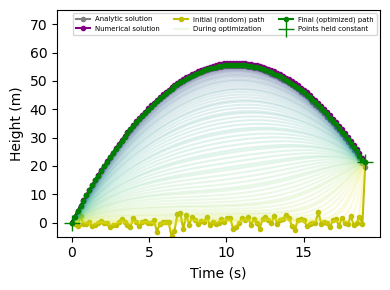

In [7]:
dt = 0.19
x0 = 1.5*torch.randn(len(x_num), requires_grad=True)  # a random path through space
x0[0].data *= 0.0 ; x0[-1].data *= 0.0  # set first and last points to zero
x0[-1].data += x_num[-1]  # set last point to be the end height of the numerical solution

t, x, xs_ncf = get_path_between(x0.clone(), steps=20000, step_size=1e-2, dt=dt)

plt.figure(figsize=[4,3])
# plt.title('Minimizing the Action')
plt.plot(t_ana, x_ana, '.-', color='gray', label='Analytic solution')
plt.plot(t_num, x_num, '.-', color='purple', label='Numerical solution')

plt.plot(t, x0.detach().numpy(), 'y.-', label='Initial (random) path')
for i, xi in enumerate(xs_ncf):
    label = 'During optimization' if i==15 else None
    plt.plot(t, xi, alpha=0.15, color=plt.cm.viridis( 1-i/(len(xs_ncf)-1) ), label=label)
plt.plot(t, x.detach().numpy(), 'g.-', label='Final (optimized) path')
plt.plot(t[[0,-1]], x0.data[[0,-1]], 'g+', markersize=12, label='Points held constant')

plt.ylim(-5, 75)
plt.xlabel('Time (s)') ; plt.ylabel('Height (m)') ; plt.legend(fontsize=5, ncol=3)
plt.tight_layout()  ; plt.show()